In [1]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
race = fastf1.get_session(2023, "British", 'R')
race.load()

driver_laps = race.laps.pick_quicklaps().reset_index()
drivers = pd.unique(race.laps['Driver'])

stints = driver_laps[["Driver", "Stint", "Compound", "LapNumber", "LapTime", "TyreLife"]]
stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
stints['Color'] = stints['FullName'].map(fastf1.plotting.DRIVER_COLORS)
stints.reset_index(drop=True)
stints.head()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\WillMItchell\AppData\Local\Temp\fastf1.
	Size: 140.84 MB
core           INFO 	Loading data for British Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31

,Driver,Stint,Compound,LapNumber,LapTime,TyreLife,FullName,Color
0,VER,1.0,MEDIUM,2.0,0 days 00:01:33.433000,2.0,max verstappen,#0600ef
1,VER,1.0,MEDIUM,3.0,0 days 00:01:32.730000,3.0,max verstappen,#0600ef
2,VER,1.0,MEDIUM,4.0,0 days 00:01:32.780000,4.0,max verstappen,#0600ef
3,VER,1.0,MEDIUM,5.0,0 days 00:01:32.582000,5.0,max verstappen,#0600ef
4,VER,1.0,MEDIUM,6.0,0 days 00:01:33.027000,6.0,max verstappen,#0600ef


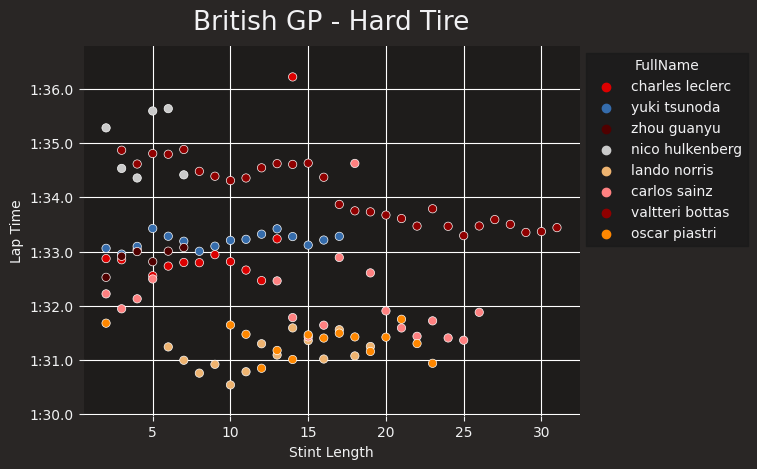

In [3]:
fig, ax = plt.subplots()
sns.scatterplot(data=stints.loc[stints['Compound'] == 'HARD'].reset_index(),
            x="TyreLife",
            y="LapTime",
            ax=ax,
            hue="FullName",
            palette=fastf1.plotting.DRIVER_COLORS,
            legend='auto')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_title('British GP - Hard Tire')
ax.set_xlabel('Stint Length')
ax.set_ylabel('Lap Time')
ax.invert_yaxis()

ax.margins(0.05, 0.1)

plt.grid(color='w', which='both', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

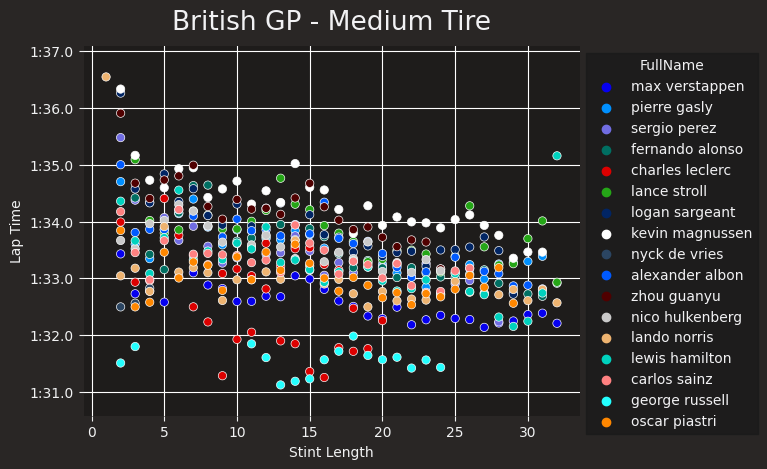

In [4]:
fig, ax = plt.subplots()

sns.scatterplot(data=stints.loc[stints['Compound'] == 'MEDIUM'].reset_index(),
            x="TyreLife",
            y="LapTime",
            ax=ax,
            hue="FullName",
            palette=fastf1.plotting.DRIVER_COLORS,
            legend='auto')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_title('British GP - Medium Tire')
ax.set_xlabel('Stint Length')
ax.set_ylabel('Lap Time')
ax.invert_yaxis()

ax.margins(0.05, 0.1)

plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

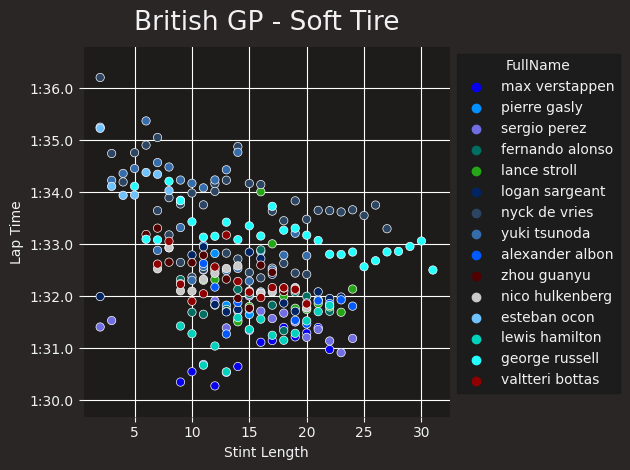

In [5]:
fig, ax = plt.subplots()

sns.scatterplot(data=stints.loc[stints['Compound'] == 'SOFT'].reset_index(),
            x="TyreLife",
            y="LapTime",
            ax=ax,
            hue="FullName",
            palette=fastf1.plotting.DRIVER_COLORS,
            legend='auto')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_title('British GP - Soft Tire')
ax.set_xlabel('Stint Length')
ax.set_ylabel('Lap Time')
ax.invert_yaxis()

ax.margins(0.05, 0.1)

plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()